```
pip install apio
```

On Windows if you get a permission error:

```
(python.exe -m pip install apio)
```

Once `apio` is installed, installed the `oss-cad-suite`:

```
apio install oss-cad-suite
```

Other links:
https://github.com/YosysHQ/nextpnr/issues/660
https://github.com/tgingold/OpenTDC/tree/master

In [54]:
import time
from glitchmeter import GlitchMeter
from datetime import datetime
import json
import struct
import numpy as np
import matplotlib.pyplot as plt

In [81]:
gm = GlitchMeter(daccom="com15", dir="rtl")

KeyboardInterrupt: 

In [3]:
scope = gm.scope
scope.clock.adc_mul = 1
scope.clock.clkgen_freq = 20E6

scope.glitch.enabled = True

scope.glitch.clk_src = "pll"
scope.glitch.trigger_src = "ext_single"

In [9]:
NUM_ELEMENTS = 3

for mv in range(900, 1300, 10):
    good = False
    
    while good is False:
        scope = gm.scope
        gm.set_coremv(mv)

        time.sleep(0.5)

        scope.glitch.enabled = True

        gm.build_and_load(NUM_ELEMENTS)
        time.sleep(0.25)

        scope.io.tio1 = True
        time.sleep(0.01)
        scope.io.tio1 = False

        pattern = gm.getpattern(False)
        pltdata = []

        p  = pattern[0]
        bpat = bin(int(p.hex(), 16))
        cnt = bpat.count('1')

        if cnt != 32:
            good = True

            #print(bpat)
            print("%d mV = %d"%(mv, cnt))
    


900 mV = 27
910 mV = 30
920 mV = 29
930 mV = 30
940 mV = 29
950 mV = 27
960 mV = 26
970 mV = 26
980 mV = 26
990 mV = 23
1000 mV = 21
1010 mV = 19
1020 mV = 19
1030 mV = 18
1040 mV = 17
1050 mV = 17
1060 mV = 16
1070 mV = 15
1080 mV = 14
1090 mV = 13
1100 mV = 12
1110 mV = 9
1120 mV = 9
1130 mV = 8
1140 mV = 6
1150 mV = 6
1160 mV = 3
1170 mV = 2
1180 mV = 2
1190 mV = 2
1200 mV = 2
1210 mV = 2
1220 mV = 1
1230 mV = 0
1240 mV = 0
1250 mV = 0
1260 mV = 0
1270 mV = 0
1280 mV = 0
1290 mV = 0


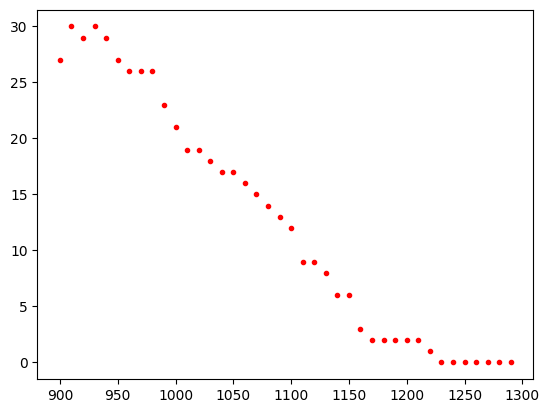

In [19]:
plt.figure()

for s in """900 mV = 27
910 mV = 30
920 mV = 29
930 mV = 30
940 mV = 29
950 mV = 27
960 mV = 26
970 mV = 26
980 mV = 26
990 mV = 23
1000 mV = 21
1010 mV = 19
1020 mV = 19
1030 mV = 18
1040 mV = 17
1050 mV = 17
1060 mV = 16
1070 mV = 15
1080 mV = 14
1090 mV = 13
1100 mV = 12
1110 mV = 9
1120 mV = 9
1130 mV = 8
1140 mV = 6
1150 mV = 6
1160 mV = 3
1170 mV = 2
1180 mV = 2
1190 mV = 2
1200 mV = 2
1210 mV = 2
1220 mV = 1
1230 mV = 0
1240 mV = 0
1250 mV = 0
1260 mV = 0
1270 mV = 0
1280 mV = 0
1290 mV = 0""".split("\n"):
    values = s.split(" = ")
    mv = int(values[0][:-3])
    result = int(values[1])
    
    plt.plot(mv, result, '.r')

In [5]:
for i in range(0, 32):
    NUM_ELEMENTS = i
    print("Elements = %d"%i)

    scope = gm.scope

    scope.glitch.enabled = True

    gm.build_and_load(NUM_ELEMENTS)

    scope.io.tio1 = True
    time.sleep(0.01)
    scope.io.tio1 = False

    pattern = gm.getpattern(False)
    pltdata = []

    for p in pattern:
        bpat = bin(int(p.hex(), 16))
        print(bpat)
        print(bpat.count('1'))
        res = int(p.hex(), 16)

        break


Elements = 0
0b11111111111111111111111111111111
32
Elements = 1
0b0
0
Elements = 2
0b11111111111111111111111111111111
32
Elements = 3
0b11111111111111111111111111111111
32
Elements = 4
0b0
0
Elements = 5
0b11111111111111111111111111111111
32
Elements = 6
0b11111111111111111111111111111111
32
Elements = 7
0b11111111111111111111111111111111
32
Elements = 8
0b0
0
Elements = 9
0b11111111111111111111111111111111
32
Elements = 10
0b11111111111111111111111111111111
32
Elements = 11


KeyboardInterrupt: 

In [6]:
scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

pattern = gm.getpattern(True)
pltdata = []

for p in pattern:

    res = int(p.hex(), 16)

    mv_list = []
    close_list = []


USBErrorIO: LIBUSB_ERROR_IO [-1]

In [50]:
scope = gm.scope
scope.clock.adc_mul = 1
scope.clock.clkgen_freq = 20E6

scope.glitch.enabled = True

scope.glitch.clk_src = "pll"
scope.glitch.trigger_src = "ext_single"

In [34]:
i = 50
NUM_ELEMENTS = i
print("Elements = %d"%i)

scope = gm.scope

scope.glitch.enabled = True

gm.build_and_load(NUM_ELEMENTS)

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

pattern = gm.getpattern(False)

for p in pattern:
    bpat = bin(int(p.hex(), 16))
    print(bpat)
    print(bpat.count('1'))
    res = int(p.hex(), 16)


Elements = 50
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
25
0b11111111111111111111111110000000
2

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111000000000000000
11111111111111111000000000000000
11111111111111111111111100111000
11111111111111111100000000000000
11111111111111111111010000000000
11111111111111111111010000000000
11111111111111111100000000000000
11111111111111111111010000000000
11111111111111111100000000000000
11111111111111111110000000000000
11111111111111111110000000000000
11111111111111111100000000000000
11111111111111111110010000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
1111111111

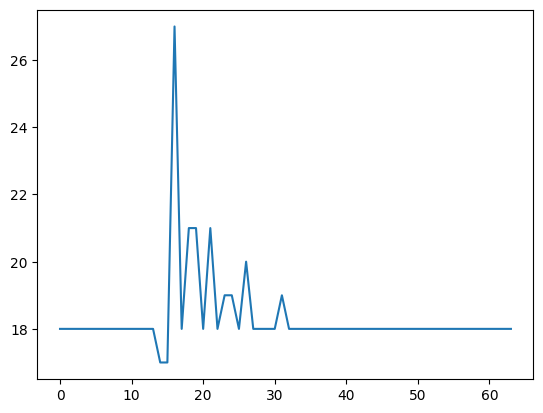

In [81]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 1
scope.glitch.output = "enable_only"

scope.glitch.width = 1200

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

Good stuff below here!!!

In [55]:
gm = GlitchMeter(None, None, dir="rtl")

In [56]:
scope = gm.scope
scope.clock.adc_mul = 1
scope.clock.clkgen_freq = 25E6

scope.glitch.enabled = True

scope.glitch.clk_src = "pll"
scope.glitch.trigger_src = "ext_single"

In [59]:
scope.clock.clkgen_freq = 25E6

In [61]:
scope.io.glitch_trig_mcx = "trigger"
scope.io.glitch_trig_mcx = "glitch"

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
1111111111

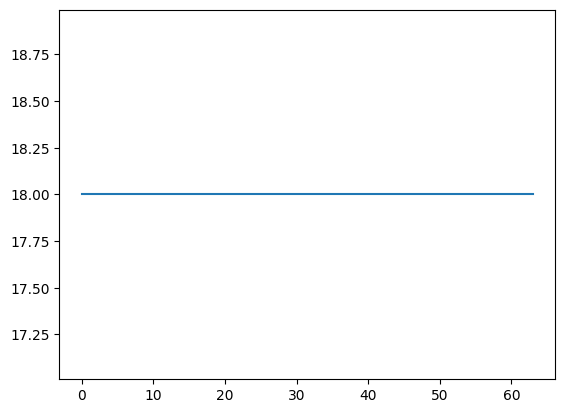

In [32]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 1
scope.glitch.output = "enable_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [79]:
#np.save("25mhz_tdc_1cycle_vglitch_pltdata.npy", pltdata)
#np.save("25mhz_tdc_1cycle_vglitch_pattern.npy", pattern)

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
1111111111

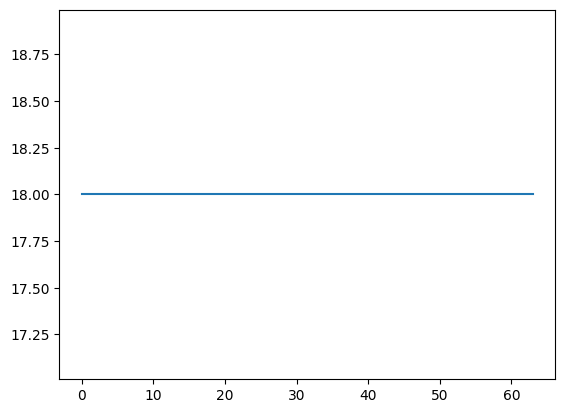

In [33]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 4
scope.glitch.output = "glitch_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [10]:
#np.save("25mhz_tdc_4cycleglitchonly_vglitch_pltdata.npy", pltdata)
#np.save("25mhz_tdc_4cycleglitchonly_vglitch_pattern.npy", pattern)

In [ ]:
EMFI Stuff:

In [25]:
scope.clock.clkgen_freq = 25E6

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111110000000000000
11111111111111111111010000000000
11111111111111111111111000110000
11111111111111111111111000110000
11111111111111111111110000100000
11111111111111111111010000000000
11111111111111111110000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111000000000000000
11111111111111111000000000000000
11111111111111111000000000000000
1111111111

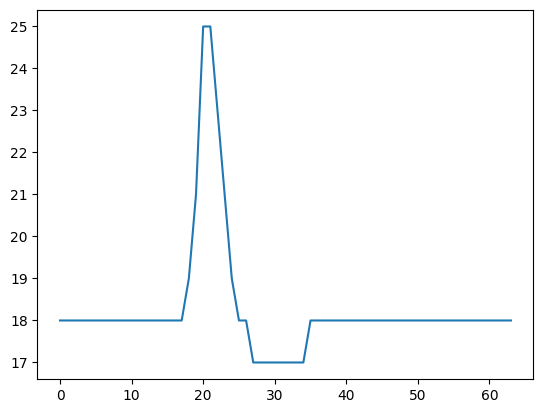

In [52]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 0
scope.glitch.repeat = 1
scope.glitch.output = "enable_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [53]:
#np.save("hwaes_25mhz_tdc_picoemp_14cycftint_pltdata.npy", pltdata)
#np.save("hwaes_25mhz_tdc_picoemp_14cycftint_pattern.npy", pattern)

#np.save("25mhz_tdc_picoemp_128pl_pltdata.npy", pltdata)
#np.save("25mhz_tdc_picoemp_64pl_pltdata.npy", pltdata)
#np.save("25mhz_tdc_picoemp_32pl_pltdata.npy", pltdata)
#np.save("25mhz_tdc_picoemp_16pl_pltdata.npy", pltdata)
np.save("25mhz_tdc_picoemp_14pl_pltdata.npy", pltdata)


11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111110000000000000
11111111111111111110010000000000
11111111111111111111010000000000
11111111111111111111110000000000
11111111111111111111010000000000
11111111111111111111010000000000
11111111111111111110010000000000
11111111111111111110000000000000
11111111111111111110000000000000
11111111111111111100000000000000
1111111111

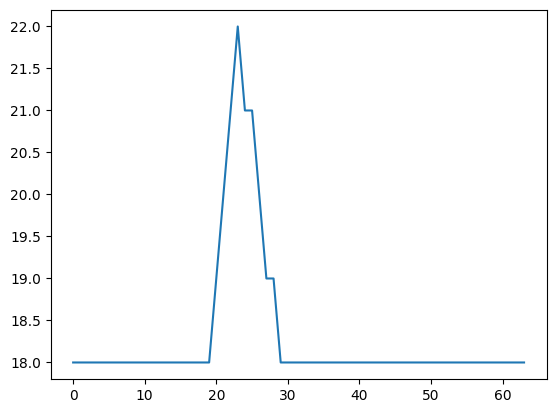

In [11]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 5
scope.glitch.output = "enable_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [12]:
#np.save("hwaes_25mhz_tdc_4cyclesenable_bbi_pltdata.npy", pltdata)
#np.save("hwaes_25mhz_tdc_4cyclesenable_bbi_pattern.npy", pattern)

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111110000000000000
11111111111111111111010000000000
11111111111111111111111000110000
11111111111111111111111100111001
11111111111111111111111111111111
11111111111111111111111111111111
10111111111111111111111111111111
00100111111111111111111111111111
00000011111111111111111111111111
00000001011111111111111111111111
1100000000

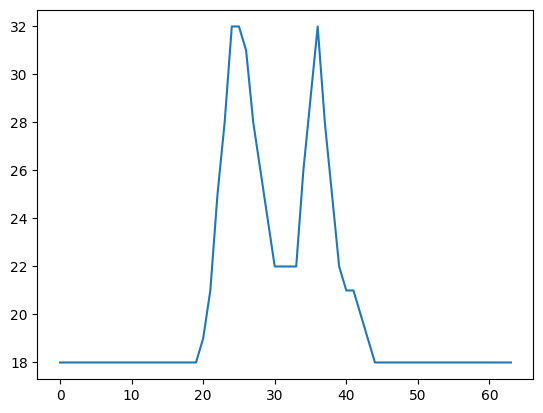

In [18]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 10
scope.glitch.output = "enable_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = True
scope.io.glitch_hp = True

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [19]:
#np.save("sw_25mhz_tdc_10cyclesenable_bbi_pltdata.npy", pltdata)
#np.save("sw_25mhz_tdc_10cyclesenable_bbi_pattern.npy", pattern)

11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111100000000000000
11111111111111111111111000110000
00000000000000001111111111111111
00000011111111111111111111111111
00000011111111111111111111111111
11111111111111111111111000110000
11111111111111111111111111111111
11111111111111111111111000110000
11111111111111111000000000000000
11111111111111111100000000000000
1111111111

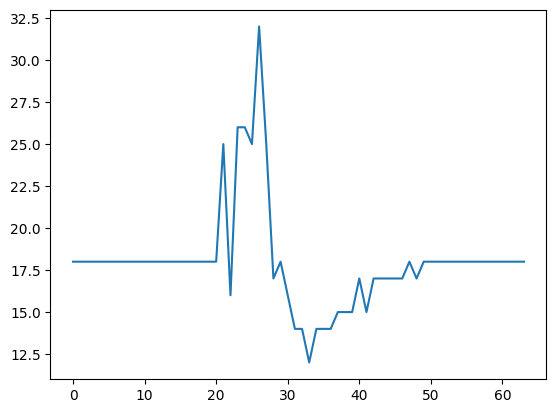

In [63]:
NUM_ELEMENTS = 3

scope = gm.scope

gm.build_and_load(NUM_ELEMENTS, "triggered", "GPIO4")


scope.glitch.ext_offset = 1
scope.glitch.repeat = 4
scope.glitch.output = "glitch_only"

scope.glitch.width = 1950
scope.glitch.offset = 3800

scope.io.glitch_lp = False
scope.io.glitch_hp = False

scope.io.tio1 = True
time.sleep(0.01)
scope.io.tio1 = False

scope.arm()

time.sleep(0.01)
scope.io.tio4 = True
time.sleep(0.001)
scope.io.tio4 = False
time.sleep(0.1)

pattern = gm.getpattern(True)

pltdata = []
for p in pattern:
    value = bin(int(p.hex(), 16)).count('1')
    pltdata.append(value)

plt.plot(pltdata)
plt.show()

In [64]:
#np.save("sw_25mhz_tdc_15picoempcycles_pltdata.npy", pltdata)
#np.save("sw_25mhz_tdc_15picoempcycles_pattern.npy", pattern)